In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [18]:
#Read in data
path = "/home/kishen/documents/python_projects/disaster_tweets/data/"

raw_df = pd.read_csv(path + "tweets.csv")

### About the data

In [3]:
#Preview data
display(raw_df.shape)
raw_df.head()

(11370, 5)

,id,keyword,location,text,target
0,0,ablaze,NaN,"Communal violence in Bhainsa, Telangana. ""Ston...",1
1,1,ablaze,NaN,Telangana: Section 144 has been imposed in Bha...,1
2,2,ablaze,New York City,Arsonist sets cars ablaze at dealership https:...,1
3,3,ablaze,"Morgantown, WV",Arsonist sets cars ablaze at dealership https:...,1
4,4,ablaze,NaN,"""Lord Jesus, your love brings freedom and pard...",0


In [4]:
#Missing data
raw_df.isna().sum()

id             0
keyword        0
location    3418
text           0
target         0
dtype: int64

In [5]:
#duplicate tweets
raw_df["text"].duplicated().sum()

147

**Data Cleaning**

In [6]:
clean_df = raw_df.copy()
clean_df.drop(["id", "location", "keyword"], axis = 1, inplace= True)

clean_df.head()

,text,target
0,"Communal violence in Bhainsa, Telangana. ""Ston...",1
1,Telangana: Section 144 has been imposed in Bha...,1
2,Arsonist sets cars ablaze at dealership https:...,1
3,Arsonist sets cars ablaze at dealership https:...,1
4,"""Lord Jesus, your love brings freedom and pard...",0


In [7]:
#Check on duplicated text/targets
print("Duplicate rows:", str(clean_df.duplicated().sum()))

#drop duplicates
clean_df.drop_duplicates(subset= ["text"], inplace= True)


Duplicate rows: 145


In [8]:
#Removing urls from the text data
import re
clean_df['text'] = [re.sub("https\S+", "", x) for x in clean_df['text']]

In [9]:
#remove #'s
clean_df['text'] = [re.sub("#", "", x) for x in clean_df['text']]

#Remove single character words(rogue s's and t's)
clean_df['text'] = [re.sub("(?:^| )\w(?:$| )", "", x) for x in clean_df['text']]

### EDA

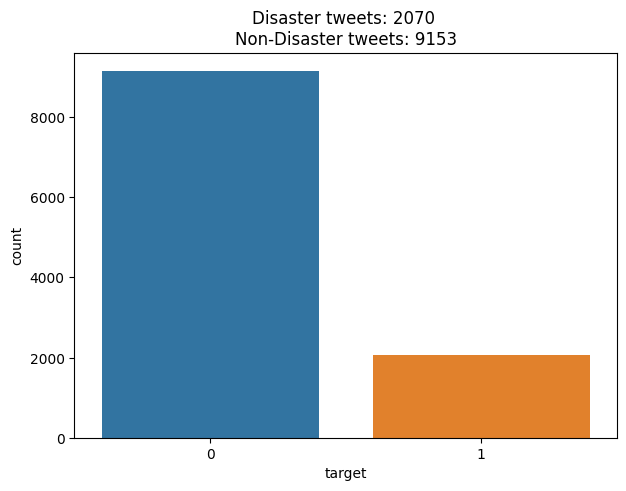

In [10]:
#target distribution
f, ax = plt.subplots(figsize = (7,5))

sns.countplot(x= clean_df['target'], ax= ax)

disaster = sum(clean_df['target'] == 1)
no_disaster = sum(clean_df['target'] == 0)

ax.set_title("Disaster tweets: %s \nNon-Disaster tweets: %s" % (disaster, no_disaster));


In [11]:
#wordmaps for disaster vs non-disaster
from distutils.command.clean import clean
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

disaster_df = clean_df.loc[clean_df['target'] == 1]
no_disaster_df = clean_df.loc[clean_df['target'] == 0]

In [12]:
#disaster cloud
stopwords = set(STOPWORDS)
disaster_tokens = " "
for tweet in disaster_df['text']:
    tweet = str(tweet)

    tokens = tweet.split()

    #lower tokens
    for i in range(len(tokens)):
        tokens[i]= tokens[i].lower()

    disaster_tokens += " ".join(tokens) + " "
    


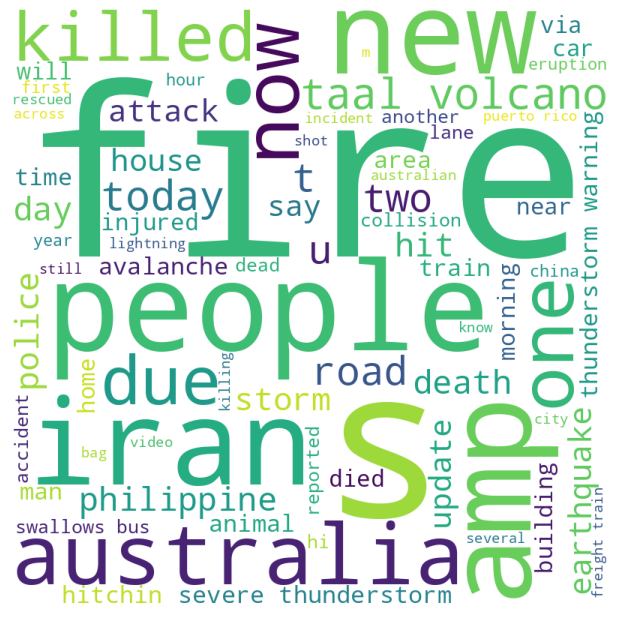

In [13]:
wordcloud = WordCloud(width = 800, height = 800,
                background_color ='white',
                 max_words=75,
                stopwords = stopwords,
                min_font_size = 10).generate(disaster_tokens)
 
# plot the WordCloud image                      
plt.figure(figsize = (6,6), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
 
plt.show()

In [14]:
#non-disaster cloud
stopwords = set(STOPWORDS)
ndisaster_tokens = " "
for tweet in no_disaster_df['text']:
    tweet = str(tweet)

    tokens = tweet.split()

    #lower tokens
    for i in range(len(tokens)):
        tokens[i]= tokens[i].lower()

    ndisaster_tokens += " ".join(tokens) + " "
    


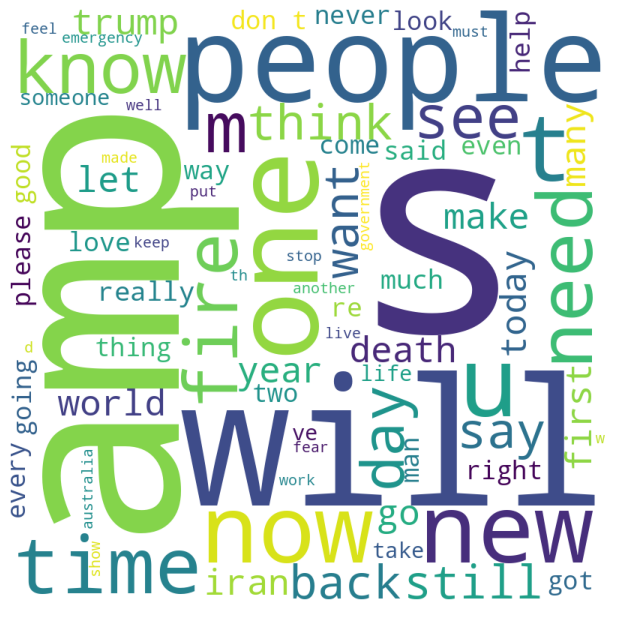

In [15]:
wordcloud = WordCloud(width = 800, height = 800,
                background_color ='white',
                 max_words=75,
                stopwords = stopwords,
                min_font_size = 10).generate(ndisaster_tokens)
 
# plot the WordCloud image                      
plt.figure(figsize = (6,6), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
 
plt.show()

In [19]:
#Write clean_df to csv
clean_df.to_csv(path + "clean_tweets.csv", index= False)